<a href="https://colab.research.google.com/github/jecampagne/cours_mallat_cdf/blob/main/cours2025/WienerFilter_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wiener filter on a corrupted Gaussian process

In [1]:
import numpy as np
from  scipy import signal

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 16

In [3]:
rng = np.random.default_rng()

In [4]:
fs = 10e3

N = 1024

amp = 20

freq = 1234.0

noise_power = 0.01 * fs / 2

time = np.arange(N) / fs

In [5]:
b, a = signal.butter(5, 0.02, 'low') # low pass filter

x = rng.normal(scale=np.sqrt(noise_power), size=time.shape) # white noie

y = signal.lfilter(b, a, x)  # signal gaussian process

sigma_corrupt = 0.3*np.sqrt(noise_power)
noise = rng.normal(scale=sigma_corrupt, size=time.shape)   # noise corruption

y_noisy = y+ noise  # noisy signal

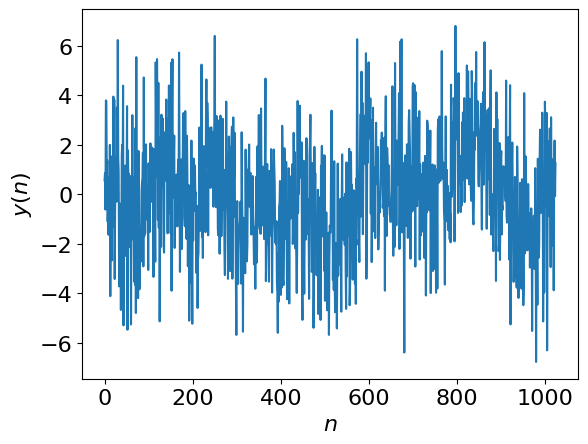

In [6]:
plt.plot(y_noisy)
plt.xlabel(r"$n$")
plt.ylabel(r"$y(n)$");

In [7]:
freqs, Pyy = signal.csd(y, y, nperseg=N)               # power spectrum of the gaussian
freqs, Pnn = signal.csd(noise, noise, nperseg=N)       # power spectrum of the noise


In [8]:
len(Pnn)

513

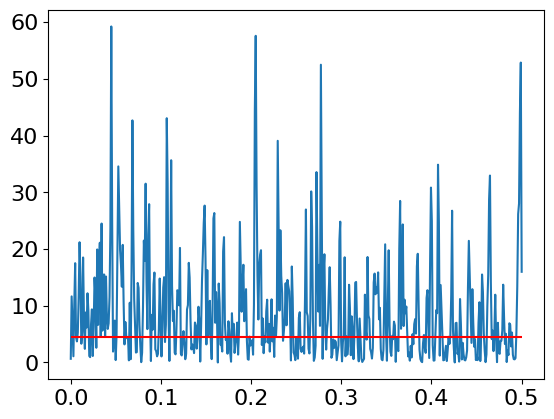

In [9]:
plt.plot(freqs,Pnn)
plt.hlines(sigma_corrupt**2,freqs[0],freqs[-1],color='red')
#plt.plot(Pyy)

In [10]:
Wh = Pyy/(Pyy+Pnn)  # filtre de Wiener parfait

Text(0.5, 1.0, 'Wiener Filter')

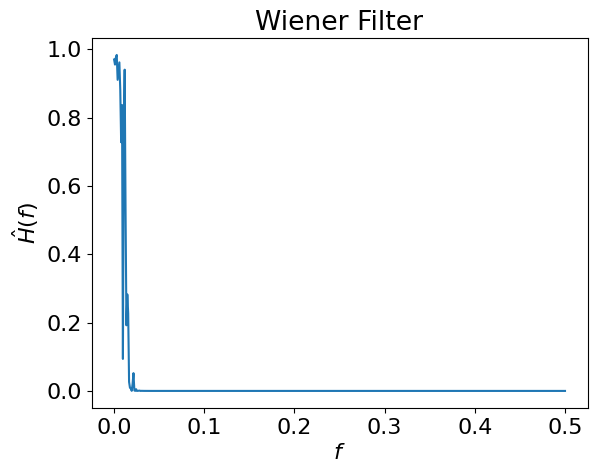

In [11]:
plt.plot(freqs,Wh)
plt.xlabel(r"$f$")
plt.ylabel(r"$\hat{H}(f)$");
plt.title("Wiener Filter")

In [12]:
hat_noisy = np.fft.rfft(y_noisy)  # Fourier Transform of noisy signal

In [13]:
y_filtered_perfect= np.fft.irfft(hat_noisy * Wh)

In [14]:
a = np.mean(y**2)

In [15]:
b= np.mean((y-y_noisy)**2)

In [16]:
snr_before = 10*np.log10(a/b) # PSNR before filtering

In [17]:
c = np.mean((y-y_filtered_perfect)**2)

In [18]:
snr_after =10*np.log10(a/c)  # PSNR after filtering

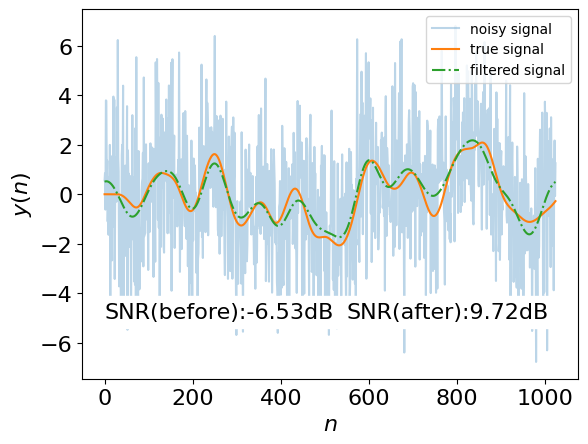

In [21]:
plt.plot(y_noisy,alpha=0.3, label="noisy signal")
plt.plot(y,label="true signal")
plt.plot(y_filtered_perfect,ls='-.',label="filtered signal")
plt.xlabel(r"$n$")
plt.ylabel(r"$y(n)$");
plt.text(0,-5,f"SNR(before):{snr_before:.2f}dB",backgroundcolor="white")
plt.text(550,-5,f"SNR(after):{snr_after:.2f}dB",backgroundcolor="white")

plt.legend(fontsize=10,loc='upper right');